In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import random

# Logistic Regression
Problem Statement

You are given the air quality data of few major cities in India. This data includes several air quality related variables such as PM2.5, PM10, NOx, CO etc. and Air quality index (AQI). Your task is to learn a regression model on the given data to predict AQI from the input variables

In [8]:
data = pd.read_csv('X:\GIt\CP 318 Worksheet Practise\Data\AQI_data.csv')
data.head()

,City,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,69.415987,118.127103,39.480968,22.424793,23.483476,46.350645,43.602903,1.463871,2.531290,2.976452,184.257428
1,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,3.280840,8.700972,3.070128,166.463582
2,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,0.000000,0.000000,0.000000,166.463582
3,Ahmedabad,88.851290,118.127103,95.549355,33.074194,23.483476,51.065161,109.395807,18.272581,72.700323,13.217742,675.208503
4,Ahmedabad,89.456452,118.127103,47.808065,42.160000,23.483476,52.384562,63.513226,4.097097,32.354839,6.971613,755.516129


In [9]:
data.describe()

,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,99.590959,147.684710,43.517865,2.952317,28.308431,36.732336,17.252148,4.003259,9.955184,2.888525,218.596588
std,61.128516,69.500772,32.936226,6.388391,23.353292,17.483902,17.861501,6.081830,11.832329,2.169866,122.624385
min,33.954876,50.716129,0.000000,0.000000,2.434839,6.630968,3.890323,0.000000,0.000000,0.000000,78.258065
25%,62.167097,114.707340,22.081048,0.931371,17.850817,25.416048,7.983878,0.902710,2.478065,2.000000,140.435484
50%,69.323477,118.127103,32.426820,1.355468,23.483476,34.491430,13.290000,3.126613,8.668351,3.070128,166.463582
75%,122.988710,169.921278,49.667517,2.054919,27.178790,44.889274,15.999113,4.199677,9.069363,3.070128,291.588710
max,294.982903,419.129677,182.094839,42.160000,146.495484,118.719032,109.395807,37.672258,72.700323,14.537419,755.516129


In [12]:
data_new = data.iloc[:,1:] # removing names column

In [18]:
#removing outliers
data_new = data_new[data_new['PM2.5']<200]
data_new = data_new[data_new['CO']<10]
data_new = data_new[data_new['NH3']<110]
data_new = data_new[data_new['SO2']<80]
data_new = data_new[data_new['Benzene']<25]
data_new = data_new[data_new['PM2.5']<200]


In [19]:
data_new.describe()

,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,83.013524,143.576601,39.369343,1.264023,23.981145,36.403295,13.735565,2.749523,6.698862,2.564757,181.309850
std,40.808716,61.025181,25.546385,0.840894,14.710233,16.005415,9.999454,2.932226,5.701711,1.342728,75.114654
min,35.075180,50.716129,0.000000,0.000000,2.434839,6.630968,4.390323,0.000000,0.000000,0.000000,78.258065
25%,61.068315,112.104469,23.505161,0.749032,15.777895,25.061820,8.251774,0.604758,1.841210,2.000000,131.572581
50%,67.534483,118.127103,32.309123,1.102097,22.717339,34.491430,12.842318,2.695740,7.876891,3.070128,166.463582
75%,95.111413,169.921278,47.808710,1.650806,23.548611,44.889274,14.995161,3.480726,8.700972,3.070128,218.006890
max,199.434193,328.746129,133.614000,4.619677,76.100348,79.952903,72.910968,21.236156,30.737097,5.890674,354.193548


In [26]:
data_new.columns

Index(['PM2.5', 'PM10', 'NOx', 'CO', 'NH3', 'O3', 'SO2', 'Benzene', 'Toluene',
       'Xylene', 'AQI'],
      dtype='object')

Error : 631.8463730814087


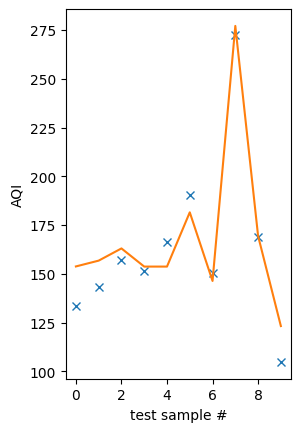

In [164]:
#input matrix with two features
n = data_new.shape[0] #No of samples
x1 = np.array(data_new['PM2.5']).reshape(n,1)
x2 = np.array(data_new['NOx']).reshape(n,1)

x = np.hstack((np.ones((66,1)),x1,x2)) 

hold_out_indices = random.sample(range(0,n),10)
x_train = x
x_train = np.delete(x, hold_out_indices,axis=0)

x_test = x[hold_out_indices]
x_train.shape,x_test.shape

#output y
y = np.array(data_new['AQI']).reshape(n,1)
y_train = y
y_train = np.delete(y,hold_out_indices)[:,None]
y_test = y[hold_out_indices]
y_train.shape,y_test.shape

# fitting
lr = LR().fit(x_train,y_train)
lr.intercept_,lr.coef_

#hold out error
y_pred = lr.intercept_*(np.ones(y_test.shape)) + x_test@(lr.coef_.T)
error = (0.5*(y_test-y_pred)**2).sum()

#plots
x_axis = range(y_test.shape[0])
plt.subplot(1,2,1)
plt.plot(x_axis,y_test,'x')
plt.plot(x_axis,y_pred)
plt.ylabel('AQI')
plt.xlabel('test sample #')
print('Error :',error)